Este breve tutorial explica algunos de los conceptos relacionados con la librería `scikit-learn` de python. 

# ¿Qué es python?

- Python es un lenguaje de programación interpretado.
- Su nombre proviene de la afición de su creador original, [Guido van Rossum](https://es.wikipedia.org/wiki/Guido_van_Rossum), por los humoristas británicos [Monty Python](https://es.wikipedia.org/wiki/Monty_Python).
- Características:
  - Programación orientada a objetos
  - Programación imperativa
  - Programación funcional.
  - Es multiplataforma y posee una licencia abierta.

# Entornos de desarrollo para python

- Entornos de desarrollo para Python
  - [Sublime Text](http://www.sublimetext.com/)
  - [PyCharm](https://www.jetbrains.com/pycharm/)
  - [Spyder](https://github.com/spyder-ide/spyder)

# `scikit-learn`

- Librería que proporciona un amplio conjunto de algoritmos de aprendizaje supervisado y no supervisado a través de una consistente interfaz en `python`.
- Publicado bajo licencia BSD y distribuido en muchos sistemas Linux, favorece el uso comercial y educacional.
- Esta librería se ha construido sobre [`SciPy`](http://www.scipy.org/) (*Scientific Python*), que debe ser instalada antes de utilizarse, incluyendo:
  - [**NumPy**](http://www.numpy.org/)
  - [**Matplotlib**](http://matplotlib.org/)
  - [SymPy](https://simpy.readthedocs.org/en/latest/)
  - [**Pandas**](http://pandas.pydata.org/)

# Características de `scikit-learn`

- Esta librería se centra en el modelado de datos y no en cargar y manipular los datos, para lo que utilizaríamos [NumPy](http://www.numpy.org/) y [Pandas](http://pandas.pydata.org/). Algunas cosas que podemos hacer con `scikit-learn` son:
  - *Clustering*.
  - Validación cruzada.
  - *Datasets* de prueba.
  - Reducción de la dimensionalidad.
  - *Ensemble methods*.
  - *Feature selection*.
  - *Parameter tuning*.

Las principales ventajas de `scikit-learn` son las siguientes:
  - Interfaz consistente ante modelos de aprendizaje automático.
  - Proporciona muchos parámetros de configuración.
  - Documentación excepcional.
  - Desarrollo muy activo.
  - Comunidad.

Jupyter Notebooks (libros de notas o cuadernos Jupyter)
==================

* Puedes ejecutar un `Cell` (celda) pulsando ``[shift] + [Enter]`` o presionando el botón `Play` en la barra de herramientas.

![](images/ipython_run_cell.png)

* Puedes obtener ayuda sobre una función u objeto presionando ``[shift] + [tab]`` después de los paréntesis de apertura ``function(``

![](images/ipython_help-1.png)

* También puedes obtener la ayuda ejecutando ``function?``

![](images/ipython_help-2.png)

## matplotlib

Una parte muy importante del aprendizaje automático es la visualización de datos. La herramienta más habitual para esto en Python es [`matplotlib`](http://matplotlib.org). Es un paquete extremadamente flexible y ahora veremos algunos elementos básicos.

Ya que estamos usando los libros (*notebooks*) Jupyter, vamos a usar una de las [funciones mágicas](https://ipython.org/ipython-doc/3/interactive/magics.html) que vienen incluidas en IPython, el modo "*matoplotlib inline*", que dibujará los *plots* directamente en el libro.

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np

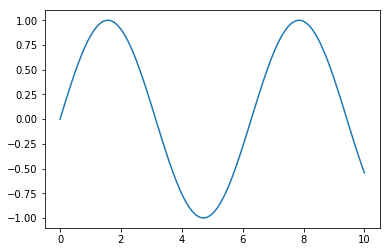

In [3]:
# Dibujar una línea
x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x));

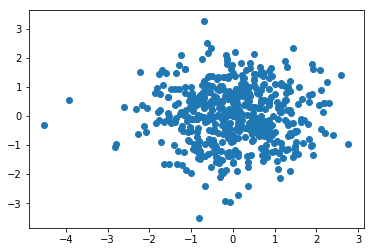

In [4]:
# Dibujar un scatter
x = np.random.normal(size=500)
y = np.random.normal(size=500)
plt.scatter(x, y);

(100, 100)


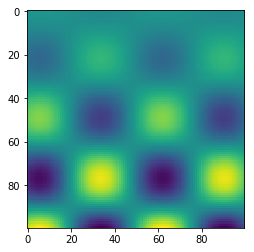

In [5]:
# Mostrar imágenes usando imshow
# - Tener en cuenta que el origen por defecto está arriba a la izquierda

x = np.linspace(start=1, stop=12, num=100)
y = x[:, np.newaxis]

im = y * np.sin(x) * np.cos(y)
print(im.shape)

plt.imshow(im);

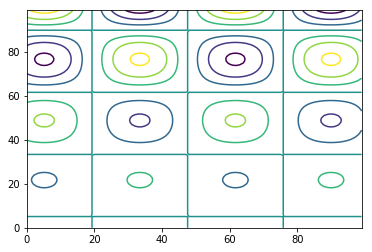

In [6]:
# Hacer un diagrama de curvas de nivel (contour plot)
# - El origen aquí está abajo a la izquierda
plt.contour(im);

<IPython.core.display.Javascript object>


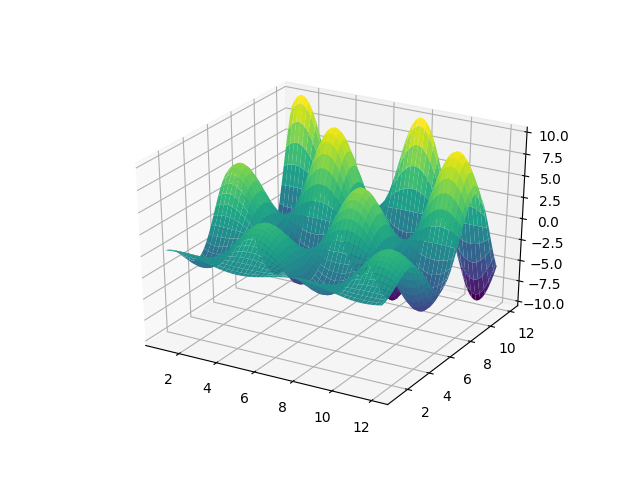

In [7]:
# El modo mágico "notebook" en lugar de inline permite que los plots sean interactivos
%matplotlib notebook

# Plot en 3D
from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection='3d')
xgrid, ygrid = np.meshgrid(x, y.ravel())
ax.plot_surface(xgrid, ygrid, im, cmap=plt.cm.viridis, cstride=2, rstride=2, linewidth=0);

Hay muchísimos tipos de gráficos disponibles. Una forma útila de explorarlos es mirar la [galería de matplotlib](http://matplotlib.org/gallery.html).

Puedes probar estos ejemplos fácilmente en el libro de notas: simplemente copia el enlace ``Source Code`` de cada página y pégalo en el libro usando el comando mágico ``%load``.
Por ejemplo:

In [8]:
# %load https://matplotlib.org/mpl_examples/mplot3d/scatter3d_demo.py

# Ejemplos de uso con el *dataset* `iris`

Vamos a utilizar un ejemplo típico en *machine learning* que es la base de datos `iris`.  En esta base de datos hay tres clases a predecir, que son tres especies distintas de la flor iris, de manera que, para cada flor, se extraen cuatro medidas o variables de entrada (longitud y ancho de los pétalos y de los sépalos, en cm). Las tres especies a distinguir son iris *setosa*, iris *virginica* e iris *versicolor*.

## Lectura de datos

Como ya hemos comentado, para la lectura de datos haremos uso de [Pandas](http://pandas.pydata.org/). Esta librería tiene un método `read_csv` que nos va a permitir leer los datos desde un fichero de texto `csv`.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import neighbors
from sklearn import preprocessing

Con estas líneas, importamos la funcionalidad necesaria para el ejemplo. `pandas` nos permitirá leer los datos, `numpy` nos va a permitir trabajar con ellos de forma matricial, `matplotlib` nos permite hacer representaciones gráficas y, de la librería `scikit-learn`, en este caso, utilizaremos un método de clasificación basado en los vecinos más cercanos y algunas funciones de preprocesamiento.

El método `read_csv` de `pandas` permite dos modos de trabajo: que el propio fichero csv tenga una fila con los nombres de las variables o que nosotros especifiquemos los nombres de las variables en la llamada. En este caso, vamos a utilizar la segunda aproximación. De esta forma, creamos un *array* con los nombres de las variables:

In [10]:
nombre_variables = ['longitud_sepalo', 'ancho_sepalo', 'longitud_petalo', 'ancho_petalo', 'clase']

y leemos el dataset con:

In [11]:
iris = pd.read_csv('data/iris.csv', names = nombre_variables)

`iris` es un objeto de la clase [`DataFrame`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) de `pandas`. También podríamos haber obviado el nombre de las columnas estableciendo `header=None`, de forma que `read_csv` le hubiera asignado un nombre por defecto, pero como lo conocemos, queda más claro si le ponemos el nombre apropiado a cada columna.

## Inspección de datos

Antes de nada, es conveniente realizar una pequeña **inspección** de los datos. Si simplemente queremos ver la cabecera del dataset, podemos utilizar el método `head(n)`, que devuelve un DataFrame incluyendo los primeros `n` patrones:

In [12]:
print(iris.head(9))

   longitud_sepalo  ancho_sepalo  longitud_petalo  ancho_petalo        clase
0              5.1           3.5              1.4           0.2  Iris-setosa
1              4.9           3.0              1.4           0.2  Iris-setosa
2              4.7           3.2              1.3           0.2  Iris-setosa
3              4.6           3.1              1.5           0.2  Iris-setosa
4              5.0           3.6              1.4           0.2  Iris-setosa
5              5.4           3.9              1.7           0.4  Iris-setosa
6              4.6           3.4              1.4           0.3  Iris-setosa
7              5.0           3.4              1.5           0.2  Iris-setosa
8              4.4           2.9              1.4           0.2  Iris-setosa


Estos datos tienen cuatro dimensiones, pero podemos visualizar una o dos de las dimensiones usando un histograma o un scatter. Primero, activamos el *matplotlib inline mode*:

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

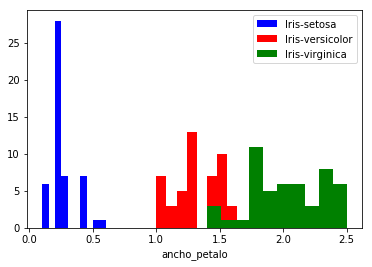

In [14]:
variable_x = 3
colors = ['blue', 'red', 'green']
iris_target_names = np.unique(iris['clase'])

for indice, color in zip(range(len(iris_target_names)), colors): #¿qué hace zip?
    #Separamos el conjunto en las distintas clases
    patrones = (iris['clase']==iris_target_names[indice]) #esta comparación la explicaremos más adelante
    plt.hist(iris.values[patrones, variable_x].reshape(sum(patrones),1), label=iris_target_names[indice], color=color)

plt.xlabel(nombre_variables[variable_x])
plt.legend(loc='upper right')
plt.show()

Recuerda que las variables de entrada eran ['longitud_sepalo', 'ancho_sepalo', 'longitud_petalo', 'ancho_petalo', 'clase'], sabiendo esto, ¿qué debemos modificar en el código superior para mostrar la longitud del sépalo?


A continuación vamos a representar en un gráfico la relación entre dos variables de entrada, así podremos ver si los patrones tienen algunas características que nos ayuden a crear un modelo lineal. Prueba distintas combinaciones de variables que se representan en los ejes, para ello modifica los valores de vairable_x y variable_y.

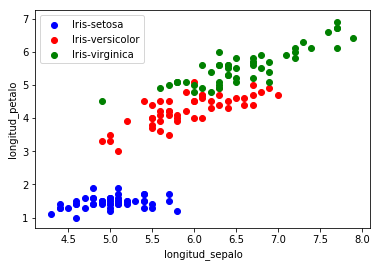

In [15]:
variable_x = 0 
variable_y = 2

colors = ['blue', 'red', 'green']

for indice, color in zip(range(len(iris_target_names)), colors): #¿qué hace zip?
    patrones = (iris['clase']==iris_target_names[indice])
    plt.scatter(iris.values[patrones, variable_x], 
                iris.values[patrones, variable_y],
                label=iris_target_names[indice],
                c=color)

plt.xlabel(nombre_variables[variable_x])
plt.ylabel(nombre_variables[variable_y])
plt.legend(loc='upper left')
plt.show()

¿Has encontrado alguna combinación que haga que los datos sean linealmente separables? Es un poco tedioso probar todas las posibles combinaciones, ¡y eso que en este ejemplo tenemos pocas variables!

### Matrices scatterplot

En lugar de realizar los plots por separado, una herramienta común que utilizan los analistas son las **matrices scatterplot**.

Estas matrices muestran los scatter plots entre todas las características del dataset, así como los histogramas para ver la distribución de cada característica.

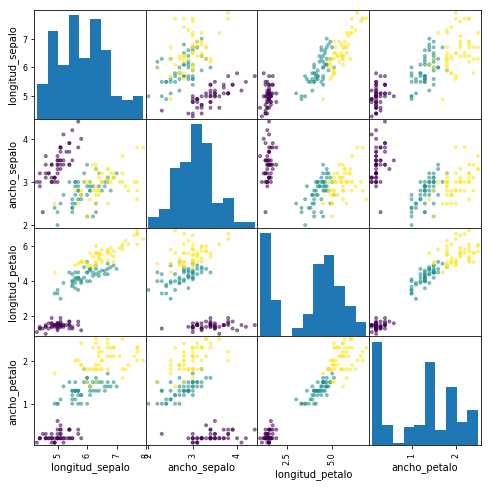

In [17]:
import pandas as pd
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(iris['clase'])
clases_numeros = le.transform(iris['clase'])

iris_df = pd.DataFrame(iris[nombre_variables], columns=nombre_variables)

#Para versiones de pandas<0.16 se debe llamar al método como pd.plotting.scatter_matrix
if pd.__version__<0.16:
    pd.plotting.scatter_matrix(iris_df, c=clases_numeros, figsize=(8, 8));
else:
    pd.tools.plotting.scatter_matrix(iris_df, c=clases_numeros, figsize=(8, 8));



## Manejo de objetos `DataFrame` y matrices numpy (`ndarray`)

Los [`DataFrame`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) son objetos que representan a los *datasets* con los que vamos a operar. Permiten realizar muchas operaciones de forma automática, ayudando a transformar las variables de forma muy cómoda. Internamente, el dataset se guarda en un array bidimensional de `numpy` (clase [`ndarray`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html)). El acceso a los elementos de un [`DataFrame`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) es algo más simple si utilizamos su versión [`ndarray`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html), para lo cual simplemente tenemos que utilizar el atributo `values`:

In [18]:
print(iris['longitud_sepalo'])

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
5      5.4
6      4.6
7      5.0
8      4.4
9      4.9
10     5.4
11     4.8
12     4.8
13     4.3
14     5.8
15     5.7
16     5.4
17     5.1
18     5.7
19     5.1
20     5.4
21     5.1
22     4.6
23     5.1
24     4.8
25     5.0
26     5.0
27     5.2
28     5.2
29     4.7
      ... 
120    6.9
121    5.6
122    7.7
123    6.3
124    6.7
125    7.2
126    6.2
127    6.1
128    6.4
129    7.2
130    7.4
131    7.9
132    6.4
133    6.3
134    6.1
135    7.7
136    6.3
137    6.4
138    6.0
139    6.9
140    6.7
141    6.9
142    5.8
143    6.8
144    6.7
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: longitud_sepalo, dtype: float64


In [19]:
print(iris[nombre_variables[0]])

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
5      5.4
6      4.6
7      5.0
8      4.4
9      4.9
10     5.4
11     4.8
12     4.8
13     4.3
14     5.8
15     5.7
16     5.4
17     5.1
18     5.7
19     5.1
20     5.4
21     5.1
22     4.6
23     5.1
24     4.8
25     5.0
26     5.0
27     5.2
28     5.2
29     4.7
      ... 
120    6.9
121    5.6
122    7.7
123    6.3
124    6.7
125    7.2
126    6.2
127    6.1
128    6.4
129    7.2
130    7.4
131    7.9
132    6.4
133    6.3
134    6.1
135    7.7
136    6.3
137    6.4
138    6.0
139    6.9
140    6.7
141    6.9
142    5.8
143    6.8
144    6.7
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: longitud_sepalo, dtype: float64


In [20]:
iris_array = iris.values
print(iris_array[:,0])

[5.1 4.9 4.7 4.6 5.0 5.4 4.6 5.0 4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.0 5.0 5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.0
 5.5 4.9 4.4 5.1 5.0 4.5 4.4 5.0 5.1 4.8 5.1 4.6 5.3 5.0 7.0 6.4 6.9 5.5
 6.5 5.7 6.3 4.9 6.6 5.2 5.0 5.9 6.0 6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
 6.3 6.1 6.4 6.6 6.8 6.7 6.0 5.7 5.5 5.5 5.8 6.0 5.4 6.0 6.7 6.3 5.6 5.5
 5.5 6.1 5.8 5.0 5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
 6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.0 6.9 5.6 7.7 6.3 6.7 7.2
 6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.0 6.9 6.7 6.9 5.8 6.8
 6.7 6.7 6.3 6.5 6.2 5.9]


La sintaxis de indexación en un [`ndarray`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html) es la siguiente:
- `array[i,j]`: accede al valor de la fila `i` columna `j`.
- `array[i:j,k]`: devuelve otro `ndarray` con la submatriz correspondiente a las filas desde la `i` hasta la `j-1` y a la columna `k`.
- `array[i:j,k:l]`: devuelve otro `ndarray` con la submatriz correspondiente a las filas desde la `i` hasta la `j-1` y a las columnas desde la `k` hasta la `l`.
- `array[i:j,:]`: devuelve otro `ndarray` con la submatriz correspondiente a las filas desde la `i` hasta la `j-1` y **todas** las columnas.
- `array[:,i:j]`: devuelve otro `ndarray` con la submatriz correspondiente a **todas** las filas y a las columnas desde la `k` hasta la `l`.
De esta forma:

In [21]:
# Mostrando un Array de Numpy
iris_array[0:2,2:4]

array([[1.4, 0.2],
       [1.4, 0.2]], dtype=object)

In [22]:
# Mostrando un DataFrame de Pandas
iris[0:2][nombre_variables[2:4]]

,longitud_petalo,ancho_petalo
0,1.4,0.2
1,1.4,0.2


In [23]:
# Mostrando un Array de Numpy
iris_array[1:6,:]

array([[4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa'],
       [5.4, 3.9, 1.7, 0.4, 'Iris-setosa']], dtype=object)

In [24]:
# Mostrando un DataFrame de Pandas
iris[1:6][nombre_variables[:]]

,longitud_sepalo,ancho_sepalo,longitud_petalo,ancho_petalo,clase
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa


Vemos que el acceso a través del `ndarray` es, por lo general, más cómodo, ya que no requerimos del nombre de las variables.

## Manejos de Arrays con numpy

Ahora vamos a manejar una matriz de valores aleatorios, para ver algunas características adicionales

In [25]:
import numpy as np

# Semilla de números aleatorios (para reproducibilidad)
rnd = np.random.RandomState(seed=123)

# Generar una matriz aleatoria
X = rnd.uniform(low=0.0, high=1.0, size=(3, 5))  # dimensiones 3x5

print(X)

[[0.69646919 0.28613933 0.22685145 0.55131477 0.71946897]
 [0.42310646 0.9807642  0.68482974 0.4809319  0.39211752]
 [0.34317802 0.72904971 0.43857224 0.0596779  0.39804426]]


(tened en cuenta que los arrays en numpy se indexan desde el 0, al igual que la mayoría de estructuras en Python)

In [26]:
# Acceder a los elementos

# Obtener un único elemento
# (primera fila, primera columna)
print "Único elemento: {0}\n".format(X[0, 0])

# Obtener una fila
# (segunda fila)
print "Segunda fila: {0}\n".format(X[1]) #O también: print(X[1,:])

# Obtener una columna
# (segunda columna)
print "Segunda columna: {0}\n".format(X[:, 1])

# Obtener la última fila
print "Última fila: {0}\n".format(X[-1])

# Obtener la última columna
print "Última columna: {0}\n".format(X[:, -1])

Único elemento: 0.696469185598

Segunda fila: [0.42310646 0.9807642  0.68482974 0.4809319  0.39211752]

Segunda columna: [0.28613933 0.9807642  0.72904971]

Última fila: [0.34317802 0.72904971 0.43857224 0.0596779  0.39804426]

Última columna: [0.71946897 0.39211752 0.39804426]



$$\begin{bmatrix}
    1 & 2 & 3 & 4 \\
    5 & 6 & 7 & 8
\end{bmatrix}^T
= 
\begin{bmatrix}
    1 & 5 \\
    2 & 6 \\
    3 & 7 \\
    4 & 8
\end{bmatrix}
$$



In [27]:
# Obtener la traspuesta
print(X.T)

[[0.69646919 0.42310646 0.34317802]
 [0.28613933 0.9807642  0.72904971]
 [0.22685145 0.68482974 0.43857224]
 [0.55131477 0.4809319  0.0596779 ]
 [0.71946897 0.39211752 0.39804426]]


In [28]:
# Crear un vector fila de números con la misma separación
# sobre un intervalo prefijado
y = np.linspace(start=0, stop=12, num=5)
print(y)

[ 0.  3.  6.  9. 12.]


In [29]:
# Transformar el vector fila en un vector columna
print(y[:, np.newaxis])

[[ 0.]
 [ 3.]
 [ 6.]
 [ 9.]
 [12.]]


In [30]:
# Obtener la forma de un array y cambiarla

# Generar un array aleatorio
rnd = np.random.RandomState(seed=123)
X = rnd.uniform(low=0.0, high=1.0, size=(3, 5))  # a 3 x 5 array

print(X)
print(X.shape)
print(X.reshape((5, 3)))

[[0.69646919 0.28613933 0.22685145 0.55131477 0.71946897]
 [0.42310646 0.9807642  0.68482974 0.4809319  0.39211752]
 [0.34317802 0.72904971 0.43857224 0.0596779  0.39804426]]
(3, 5)
[[0.69646919 0.28613933 0.22685145]
 [0.55131477 0.71946897 0.42310646]
 [0.9807642  0.68482974 0.4809319 ]
 [0.39211752 0.34317802 0.72904971]
 [0.43857224 0.0596779  0.39804426]]


In [31]:
# Indexar según un conjunto de números enteros
indices = np.array([3, 1, 0])
print(indices)
X[:, indices]

[3 1 0]


array([[0.55131477, 0.28613933, 0.69646919],
       [0.4809319 , 0.9807642 , 0.42310646],
       [0.0596779 , 0.72904971, 0.34317802]])

## Vectorización de operaciones

En `scikit-learn`, al igual que en otros lenguajes de programación como R o Matlab, debemos intentar, siempre que sea posible, *vectorizar* las operaciones. Esto es utilizar operaciones matriciales en lugar de bucles que recorran los arrays. La razón es que este tipo de operaciones están muchos más optimizadas y que el proceso de referenciación de *arrays* puede consumir mucho tiempo.

Imaginemos que queremos imprimir el área de sépalo de todas las flores. Compara la diferencia entre hacerlo mediante un bucle `for` y mediante operaciones matriciales:

In [32]:
# Generar un array con el área del sépalo (longitud*anchura), utilizando un for
# Crear un array vacío
areaSepaloArray = np.empty(iris_array.shape[0])

# Se recorre con un bucle for la matriz de datos sacando la longitud (indice 0) y el ancho (indice 1) del sepalo
for i in range(0,iris_array.shape[0]):
    areaSepaloArray[i] = iris_array[i,0] * iris_array[i,1]
    
print(areaSepaloArray)

[17.85 14.7  15.04 14.26 18.   21.06 15.64 17.   12.76 15.19 19.98 16.32
 14.4  12.9  23.2  25.08 21.06 17.85 21.66 19.38 18.36 18.87 16.56 16.83
 16.32 15.   17.   18.2  17.68 15.04 14.88 18.36 21.32 23.1  15.19 16.
 19.25 15.19 13.2  17.34 17.5  10.35 14.08 17.5  19.38 14.4  19.38 14.72
 19.61 16.5  22.4  20.48 21.39 12.65 18.2  15.96 20.79 11.76 19.14 14.04
 10.   17.7  13.2  17.69 16.24 20.77 16.8  15.66 13.64 14.   18.88 17.08
 15.75 17.08 18.56 19.8  19.04 20.1  17.4  14.82 13.2  13.2  15.66 16.2
 16.2  20.4  20.77 14.49 16.8  13.75 14.3  18.3  15.08 11.5  15.12 17.1
 16.53 17.98 12.75 15.96 20.79 15.66 21.3  18.27 19.5  22.8  12.25 21.17
 16.75 25.92 20.8  17.28 20.4  14.25 16.24 20.48 19.5  29.26 20.02 13.2
 22.08 15.68 21.56 17.01 22.11 23.04 17.36 18.3  17.92 21.6  20.72 30.02
 17.92 17.64 15.86 23.1  21.42 19.84 18.   21.39 20.77 21.39 15.66 21.76
 22.11 20.1  15.75 19.5  21.08 17.7 ]


In [33]:
# Generar un array con el área del sépalo (longitud*anchura), utilizando operaciones matriciales
print(iris_array[:,0] * iris_array[:,1])

[17.849999999999998 14.700000000000001 15.040000000000001 14.26 18.0
 21.060000000000002 15.639999999999999 17.0 12.76 15.190000000000001
 19.980000000000004 16.32 14.399999999999999 12.899999999999999 23.2
 25.080000000000002 21.060000000000002 17.849999999999998 21.66 19.38
 18.36 18.87 16.56 16.83 16.32 15.0 17.0 18.2 17.68 15.040000000000001
 14.879999999999999 18.36 21.32 23.1 15.190000000000001 16.0 19.25
 15.190000000000001 13.200000000000001 17.34 17.5 10.35 14.080000000000002
 17.5 19.38 14.399999999999999 19.38 14.719999999999999 19.61 16.5
 22.400000000000002 20.480000000000004 21.39 12.649999999999999 18.2
 15.959999999999999 20.79 11.76 19.139999999999997 14.040000000000001 10.0
 17.700000000000003 13.200000000000001 17.689999999999998 16.24 20.77
 16.799999999999997 15.66 13.640000000000002 14.0 18.880000000000003 17.08
 15.75 17.08 18.56 19.799999999999997 19.04 20.1 17.4 14.82 13.2 13.2
 15.66 16.200000000000003 16.200000000000003 20.4 20.77 14.489999999999998
 16.79999

Es más, los `ndarray` permiten aplicar operaciones lógicas, que devuelven otro `ndarray` con el resultado de realizar esas operaciones lógicas: "Obtener aquellas flores cuya longitud de pétalo es mayor que 5"

In [34]:
# El índice de la longitud de pétalo es el 2
iris_array[:,2] > 5

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True, False,  True, False,  True, False,  True,  True,
       False, False,

A su vez, este `ndarray` se puede usar para indexar el `ndarray` original: "Obtener la clase de aquellas flores cuya longitud de pétalo es mayor que 5"

In [35]:
# El índice de la longitud de pétalo es el 2 y el índice de la clase es el 4
iris_array[iris_array[:,2] > 5, 4]

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica'], dtype=object)

Imagina que ahora queremos **imprimir la longitud de sépalo** de aquellas flores cuya longitud de sépalo es mayor que 2. Compara la versión con `for` y la versión "vectorizada":

In [36]:
# Imprimir las longitudes de sépalo mayores que 2, utilizando un for
# El índice de la longitud de sépalo es el 0
iris_array = iris.values
for i in range(0,iris_array.shape[0]):
    valorSepalo = iris_array[i,0]
    if valorSepalo > 2:
        print(valorSepalo)

5.1
4.9
4.7
4.6
5.0
5.4
4.6
5.0
4.4
4.9
5.4
4.8
4.8
4.3
5.8
5.7
5.4
5.1
5.7
5.1
5.4
5.1
4.6
5.1
4.8
5.0
5.0
5.2
5.2
4.7
4.8
5.4
5.2
5.5
4.9
5.0
5.5
4.9
4.4
5.1
5.0
4.5
4.4
5.0
5.1
4.8
5.1
4.6
5.3
5.0
7.0
6.4
6.9
5.5
6.5
5.7
6.3
4.9
6.6
5.2
5.0
5.9
6.0
6.1
5.6
6.7
5.6
5.8
6.2
5.6
5.9
6.1
6.3
6.1
6.4
6.6
6.8
6.7
6.0
5.7
5.5
5.5
5.8
6.0
5.4
6.0
6.7
6.3
5.6
5.5
5.5
6.1
5.8
5.0
5.6
5.7
5.7
6.2
5.1
5.7
6.3
5.8
7.1
6.3
6.5
7.6
4.9
7.3
6.7
7.2
6.5
6.4
6.8
5.7
5.8
6.4
6.5
7.7
7.7
6.0
6.9
5.6
7.7
6.3
6.7
7.2
6.2
6.1
6.4
7.2
7.4
7.9
6.4
6.3
6.1
7.7
6.3
6.4
6.0
6.9
6.7
6.9
5.8
6.8
6.7
6.7
6.3
6.5
6.2
5.9


In [37]:
# Imprimir las longitudes de sépalo mayores que 2, utilizando operaciones matriciales
# El índice de la longitud de sépalo es el 0
print(iris_array[ iris_array[:,0] > 2, 0])

[5.1 4.9 4.7 4.6 5.0 5.4 4.6 5.0 4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.0 5.0 5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.0
 5.5 4.9 4.4 5.1 5.0 4.5 4.4 5.0 5.1 4.8 5.1 4.6 5.3 5.0 7.0 6.4 6.9 5.5
 6.5 5.7 6.3 4.9 6.6 5.2 5.0 5.9 6.0 6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
 6.3 6.1 6.4 6.6 6.8 6.7 6.0 5.7 5.5 5.5 5.8 6.0 5.4 6.0 6.7 6.3 5.6 5.5
 5.5 6.1 5.8 5.0 5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
 6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.0 6.9 5.6 7.7 6.3 6.7 7.2
 6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.0 6.9 6.7 6.9 5.8 6.8
 6.7 6.7 6.3 6.5 6.2 5.9]


Podemos usar algunas funciones adicionales sobre objetos de tipo `ndarray`. Por ejemplo, las funciones [`numpy.mean`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html) y [`numpy.std`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.std.html) nos sirven para calcular la media y la desviación típica, respectivamente, de los valores contenidos en el `ndarray` que se pasa como argumento.

Por último, podemos realizar operaciones matriciales con los `ndarray` de forma muy simple y optimizada. La función [`numpy.dot`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html) multiplica dos `ndarray`, siempre que sus dimensiones sean compatibles. La función [`numpy.transpose`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.transpose.html) nos devuelve la traspuesta de la matriz.

In [38]:
a = [[1, 0], [0, 1]]
b = [[4, 1], [2, 2]]
np.dot(a, b)

array([[4, 1],
       [2, 2]])

In [39]:
x = np.arange(4).reshape((2,2))
x

array([[0, 1],
       [2, 3]])

In [40]:
np.transpose(x)

array([[0, 2],
       [1, 3]])

In [41]:
x.T

array([[0, 2],
       [1, 3]])

**Ejercicio**: Prueba a imprimir la media y la desviación típica del **área del sépalo** de aquellas flores que son de tipo *virginica*.

In [42]:
# Escribe a continuación el código que resuelve el ejercicio propuesto:



## División de datos en entrenamiento y test

Aunque a veces nos proporcionan los datos ya divididos en los conjuntos de entrenamiento y *test*, conviene saber como podríamos realizar esta división. Debemos tener precaución al hacer divisiones en los conjuntos de datos, pues siempre tenemos que tener en cuenta el número de patrones de cada clase, para ellos vamos usar la función *Counter* de la librería *collections*:

In [43]:
from collections import Counter

# Mostramos cuántos patrones hay por cada clase
Counter(iris_array[:,-1])

Counter({'Iris-setosa': 50, 'Iris-versicolor': 50, 'Iris-virginica': 50})

Una vez confirmado que el conjunto está balanceado (hay el mismo número de patrones de todas las clases) podremos hacer divisiones del mismo sin problema.
El siguiente código muestra una función que divide los datos de forma aleatoria, utilizando operaciones *vectorizadas*:

In [44]:
def dividir_ent_test(dataframe, porcentaje=0.6):
    """ 
    Función que divide un dataframe aleatoriamente en entrenamiento y en test.
    Recibe los siguientes argumentos:
    - dataframe: DataFrame que vamos a utilizar para extraer los datos
    - porcentaje: porcentaje de patrones en el conjunto de entrenamiento
    Devuelve:
    - train: DataFrame con los datos del conjunto de entrenamiento
    - test: DataFrame con los datos del conjunto de test
    """
    # Creamos un vector de índices según el tamaño del dataframe
    indices = np.arange(len(dataframe))
    # Mezclamos el vector variando el orden
    np.random.shuffle(indices)
    # Creamos un vector del mismo tamaño que el vector de indices pero booleano con todos los valores True
    mascara = np.ones((len(dataframe),1), dtype=bool)
    # Los primeros elementos de esta máscara se ponen a False 
    # (tantos como indique el porcentaje por el número de elementos del dataframe)
    mascara[indices[int(porcentaje*len(dataframe)):]]=False
    
    train = dataframe[mascara]
    test = dataframe[~mascara]
    
    return train, test

In [45]:
iris_train, iris_test = dividir_ent_test(iris)

Ahora, podemos quedarnos con las columnas correspondientes a las variables de entrada, los atributos, (todas las columnas salvo la última) y la correspondiente a la variable de salida, la clase, (en este caso, la última columna):

In [46]:
# Conjunto de entrenamiento
train_inputs_iris = iris_train.values[:, 0:-1]
train_outputs_iris = iris_train.values[:, -1]

# Conjunto de test
test_inputs_iris = iris_test.values[:, 0:-1]
test_outputs_iris = iris_test.values[:, -1]

print(train_inputs_iris.shape)

(90, 4)


Si nos proporcionan la base de datos completa para que hagamos nosotros las particiones, todas las clases y funciones del módulo [`sklearn.cross_validation`](http://scikit-learn.org/stable/modules/cross_validation.html) de `scikit-learn` nos pueden facilitar mucho la labor.

## Labores de preprocesamiento

La librería `scikit-learn` no acepta cadenas de texto como parámetros de las funciones, todo deben de ser números. Por tanto debemos transformar la variable de salida, la clase, en números. Para ello, nos podemos valer del objeto [`sklearn.preprocessing.LabelEncoder`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html), que nos transforma automáticamente las cadenas a números. La forma en que se utiliza es la siguiente:

In [47]:
#Creación del método
label_e = preprocessing.LabelEncoder()

#Entrenamiento del método
label_e.fit(train_outputs_iris)

#Obtención de salidas
train_outputs_iris_encoded = label_e.transform(train_outputs_iris)
test_outputs_iris_encoded = label_e.transform(test_outputs_iris)

Como podéis observar, primero se crea el `LabelEncoder` y luego se "entrena" mediante el método `fit`. Para un `LabelEncoder`, "entrenar" el modelo es decidir el de cadenas de texto a números, en este caso:
- `Iris-setosa` -> 0
- `Iris-versicolor` -> 1
- `Iris-virginica` -> 2

Esta estructura (método `fit` más método `transform` o `predict`) se repite en muchos de los objetos de `scikit-learn`.

Una vez entrenado, utilizando el método `transform` del `LabelEncoder`, podremos transformar cualquier `ndarray` que queramos. Cabe destacar que nos habríamos encontrado con un error si alguna de las etiquetas del conjunto de *test* no hubiese estado en el conjunto de entrenamiento.

Hay muchas más tareas de preprocesamiento que se pueden hacer en `scikit-learn`. Consulta el paquete [`sklearn.preprocessing`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing).

## Crear y evaluar un clasificador

A continuación, vamos a crear un modelo de clasificación y a obtener su matriz de confusión. Vamos a utilizar el clasificador [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), que clasifica cada patrón asignándole la clase mayoritaria según los `k` vecinos más cercanos al patrón a clasificar. Consulta siempre la documentación de cada objeto para ver los parámetros del algoritmo (en este caso, el parámetro decisivo es `n_neighbors`). Veamos como se realizaría el entrenamiento:

In [48]:
knn = neighbors.KNeighborsClassifier()
knn.fit(train_inputs_iris, train_outputs_iris_encoded)
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


Ya tenemos el modelo entrenado. Este modelo es de tipo *lazy*, en el sentido de que no existen parámetros a ajustar durante el entrenamiento. Lo único que hacemos es acomodar las entradas en una serie de estructuras de datos que faciliten el cálculo de distancias a la hora de predecir la etiqueta de datos nuevos. Si ahora queremos predecir las etiquetas de *test*, podemos hacer uso del método `predict`, que aplica el modelo ya entrenado a datos nuevos:

In [49]:
prediccion_test = knn.predict(test_inputs_iris)
print(prediccion_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1
 1 1 1 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


Si queremos saber cómo de buena ha sido la clasificación, todo modelo de clasificación o regresión en `scikit-learn` tiene un método `score` que nos devuelve la bondad del modelo con respecto a los valores esperados, a partir de las entradas suministradas. La medida por defecto utilizada en [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) es el porcentaje de patrones bien clasificados (CCR o *accuracy*). La función se utiliza de la siguiente forma (internamente, esta función llama a `predict`):

In [50]:
precision = knn.score(test_inputs_iris, test_outputs_iris_encoded)
precision

0.9666666666666667

In [51]:
np.mean(prediccion_test == test_outputs_iris_encoded)

0.9666666666666667

Para imprimir la matriz de confusión de unas predicciones, podemos utilizar la función [`sklearn.metrics.confusion_matrix`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix), que nos va devolver la matriz ya formada:

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_outputs_iris_encoded, prediccion_test)
print(cm)

[[21  0  0]
 [ 0 19  1]
 [ 0  1 18]]


## Configurar los parámetros de un clasificador

Imagina que quieres configurar el número de vecinos más cercanos (`n_neighbors`), de forma que la precisión en entrenamiento. Lo podríamos hacer de la siguiente forma:

In [53]:
for nn in range(1,15):
    knn = neighbors.KNeighborsClassifier(n_neighbors=nn)
    knn.fit(train_inputs_iris, train_outputs_iris_encoded)
    precisionTrain = knn.score(train_inputs_iris, train_outputs_iris_encoded)
    precisionTest = knn.score(test_inputs_iris, test_outputs_iris_encoded)
    print "{0} vecinos:\tCCR entrenamiento = {1:.2f}% \tCCR test = {2:.2f}%".format(nn, precisionTrain*100, precisionTest*100)
    #print("%d vecinos:\tCCR train = %.2f%%,\tCCR test = %.2f%%" % (nn, precisionTrain*100, precisionTest*100))

1 vecinos:	CCR entrenamiento = 100.00% 	CCR test = 96.67%
2 vecinos:	CCR entrenamiento = 97.78% 	CCR test = 95.00%
3 vecinos:	CCR entrenamiento = 96.67% 	CCR test = 96.67%
4 vecinos:	CCR entrenamiento = 96.67% 	CCR test = 96.67%
5 vecinos:	CCR entrenamiento = 96.67% 	CCR test = 96.67%
6 vecinos:	CCR entrenamiento = 96.67% 	CCR test = 96.67%
7 vecinos:	CCR entrenamiento = 96.67% 	CCR test = 96.67%
8 vecinos:	CCR entrenamiento = 97.78% 	CCR test = 98.33%
9 vecinos:	CCR entrenamiento = 96.67% 	CCR test = 98.33%
10 vecinos:	CCR entrenamiento = 96.67% 	CCR test = 98.33%
11 vecinos:	CCR entrenamiento = 96.67% 	CCR test = 96.67%
12 vecinos:	CCR entrenamiento = 96.67% 	CCR test = 98.33%
13 vecinos:	CCR entrenamiento = 96.67% 	CCR test = 95.00%
14 vecinos:	CCR entrenamiento = 97.78% 	CCR test = 98.33%


# Ejercicio a realizar

Debes utilizar la base de datos `digits` para entrenar dos modelos supervisados de clasificación:
- Uno basado en los k vecinos más cercanos: [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).
- Otro basado en un modelo lineal. Vamos a utilizar el modelo de regresión logística: [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

La base de datos está disponible en la UCI, bajo el nombre [*Optical Recognition of Handwritten Digits Data Set*](http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits). Bájala y preprocésala para realizar el entrenamiento. Utiliza las particiones de entrenamiento y test incluidas en el sitio web de la UCI. Tienes que normalizar todas las variables de entrada para que queden en el intervalo `[0,1]` (consulta información sobre [MinMaxScaler](http://scikit-learn.org/stable/modules/preprocessing.html#scaling-features-to-a-range)). Intenta ajustar lo mejor posibles los parámetros de los clasificadores.

[Ver ejemplo de PCA con Digits](http://localhost:8888/notebooks/ejemplo_PCA_digits.ipynb)

[Ver ejemplo de reconocimiento facial](http://localhost:8888/notebooks/plot_eigenfaces.ipynb)

[Presentación de Kaggle](https://docs.google.com/presentation/d/12QfSy9CPiRW2AmRU-Ej6i4oBbhNzIOIB5b0rvn87SdM/edit?usp=sharing)

# Referencias
Este tutorial se ha basado en gran parte en el siguiente material:
- Python como alternativa a R en *machine learning*. Mario Pérez Esteso. [Enlace a Github](https://github.com/MarioPerezEsteso/Python-Machine-Learning). [Enlace a Youtube](https://www.youtube.com/watch?v=8yz4gWt7Klk). 
- Tutorial de Alex Gramfort y Andreas Mueller [[Github]](https://github.com/amueller/scipy-2017-sklearn)[[Youtube1]](https://www.youtube.com/watch?v=2kT6QOVSgSg)[[Youtube2]](https://www.youtube.com/watch?v=WLYzSas511I)

Se recomiendan los siguientes tutoriales adicionales para aprender más sobre el manejo de la librería:
- *An introduction to machine learning with scikit-learn*. Documentación oficial de `scikit-learn`. [http://scikit-learn.org/stable/tutorial/basic/tutorial.html](http://scikit-learn.org/stable/tutorial/basic/tutorial.html).
- *A tutorial on statistical-learning for scientific data processing*. Documentación oficial de `scikit-learn`. [http://scikit-learn.org/stable/tutorial/statistical_inference/index.html](http://scikit-learn.org/stable/tutorial/statistical_inference/index.html).

Por último, para aprender la sintaxis básica de Python en menos de 13 horas, se recomienda el siguiente curso de *CodeAcademy*:
- Curso de Python de CodeAcademy. [https://www.codecademy.com/es/learn/python](https://www.codecademy.com/es/learn/python)